In [1]:
import numpy as np
from scipy.io import loadmat
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import mne
data_path = mne.datasets.sample.data_path()
subjects_dir = data_path + '/subjects'
sample_dir = data_path + '/MEG/sample'
surf_dir = subjects_dir + '/sample/surf'

In [3]:
# Read in some raw data
raw = mne.io.read_raw_fif(sample_dir + '/sample_audvis_raw.fif',
                          preload=True)
raw.pick_types(meg=False, eeg=True)

Opening raw data file /Users/liberty/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 59 x 166800 (277.7 sec), ~78.2 MB, data loaded>

## Plot EEG sensors on the head

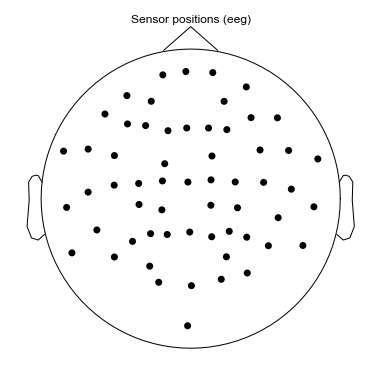

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
raw.plot_sensors(axes=ax);
# raw.info

## Plot the data with matplotlib

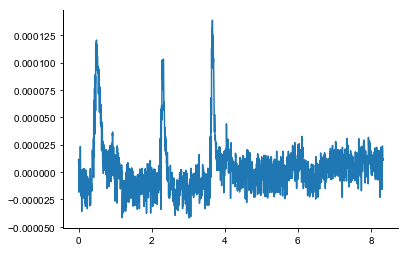

In [11]:
# Extract the timecourse
data_eeg, times = raw[:10, :5000]

# Plot the data
fig, ax = plt.subplots()
ax.plot(times, data_eeg[0])

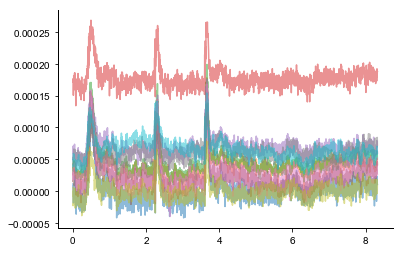

In [12]:
# We can even plot lots of raw data!
fig, ax = plt.subplots()
ax.plot(times, data_eeg[:10].T, alpha=.5);

## But we can do this in MNE!

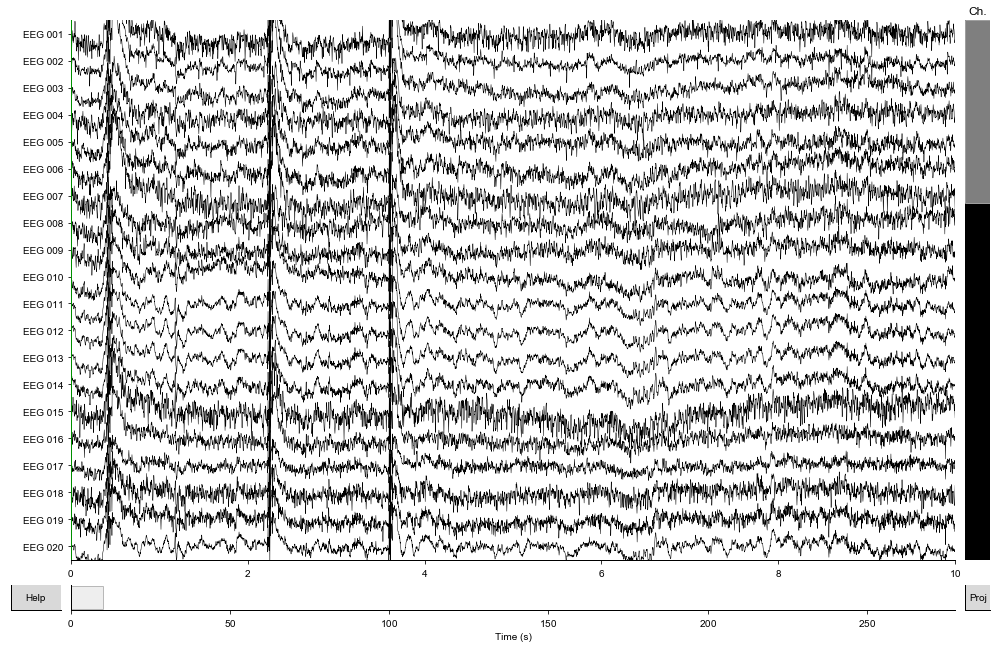

In [13]:
raw.plot();

## Filtering the data

Setting up band-pass filter from 1 - 4 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 1983 samples (3.302 sec) selected


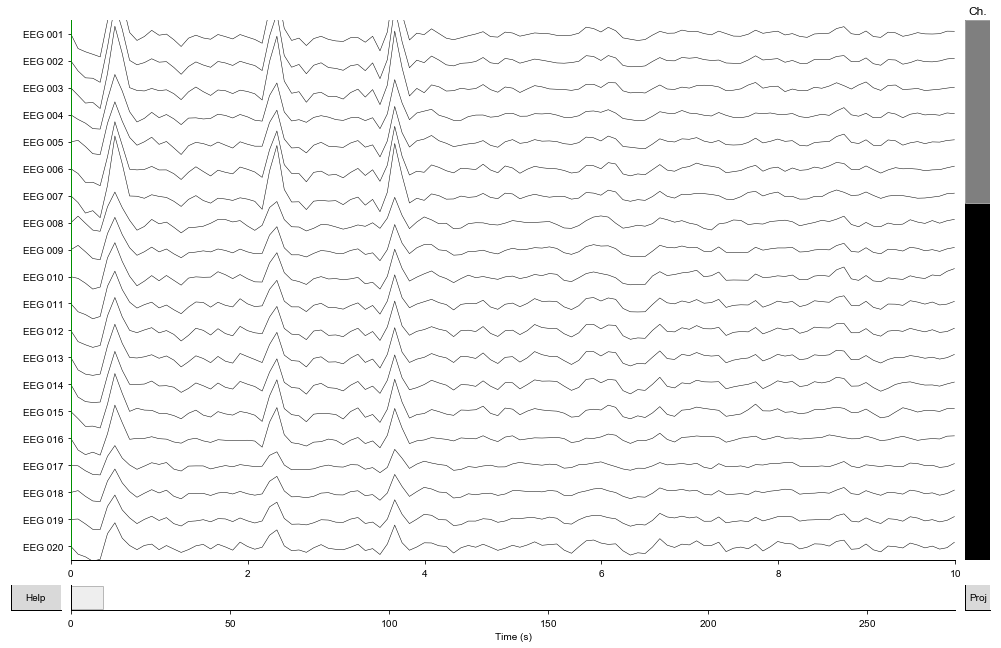

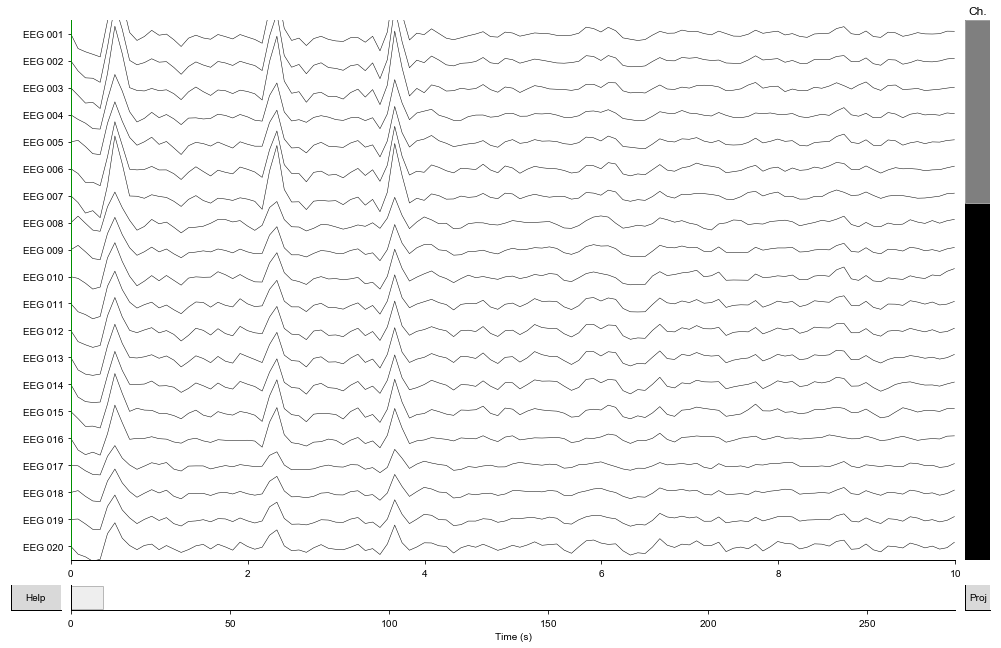

In [14]:
delta = raw.copy()
delta.filter(l_freq=1.0, h_freq=4.0)
delta.plot()

## Removing artifacts with ICA

Read more here! 

https://martinos.org/mne/stable/auto_examples/preprocessing/plot_ica_comparison.html#sphx-glr-auto-examples-preprocessing-plot-ica-comparison-py

In [15]:
from mne.preprocessing import ICA

# ICA works better with highpass filtered data
highpass_data = raw.copy()
highpass_data.filter(l_freq=1.0, h_freq=None)

ica = ICA(n_components=raw.info['nchan'], method='infomax')
ica.fit(highpass_data)

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1983 samples (3.302 sec) selected
Fitting ICA to data using 59 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 59 components
 
Fitting ICA took 60.4s.


<ICA  |  raw data decomposition, fit (infomax): 166800 samples, 59 components, channels used: "eeg">

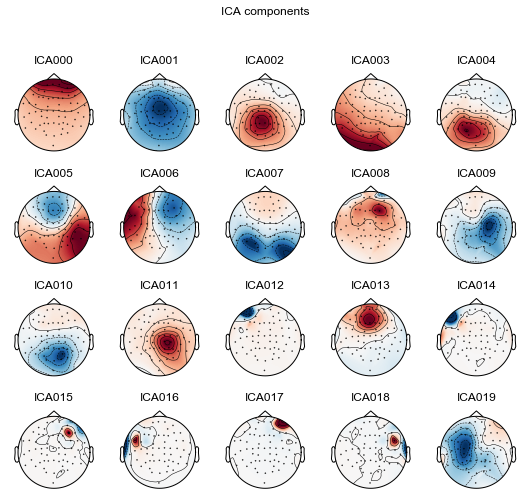

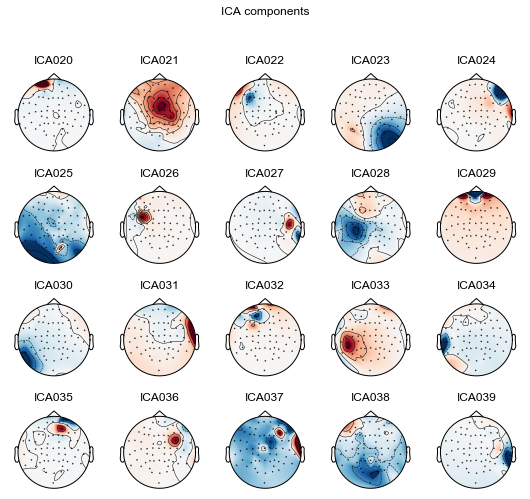

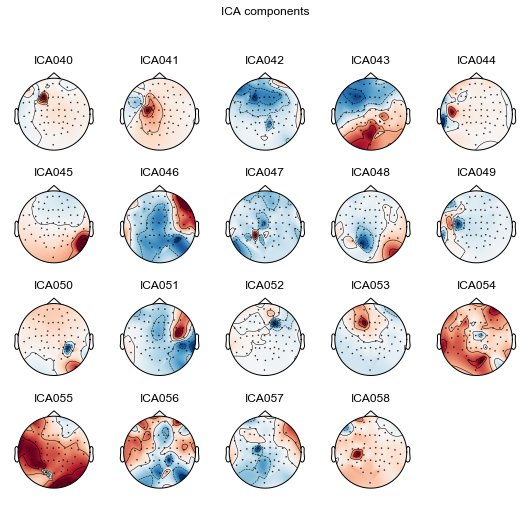

[<Figure size 540x504 with 20 Axes>,
 <Figure size 540x504 with 20 Axes>,
 <Figure size 540x504 with 20 Axes>]

In [16]:
# Plot the independent components
ica.plot_components()

Transforming to ICA space (59 components)
Zeroing out 2 ICA components


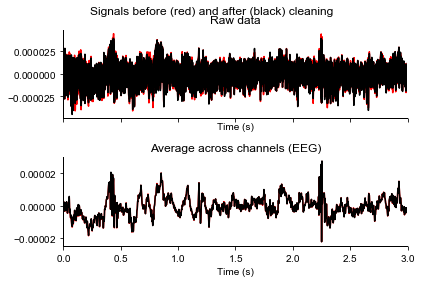

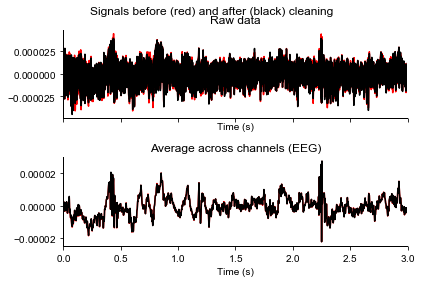

In [23]:
exclude_ics = [0,6]
ica.plot_overlay(highpass_data, exclude=exclude_ics)


In [24]:
ica.apply(highpass_data, exclude=exclude_ics)

Transforming to ICA space (59 components)
Zeroing out 2 ICA components


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 59 x 166800 (277.7 sec), ~78.2 MB, data loaded>

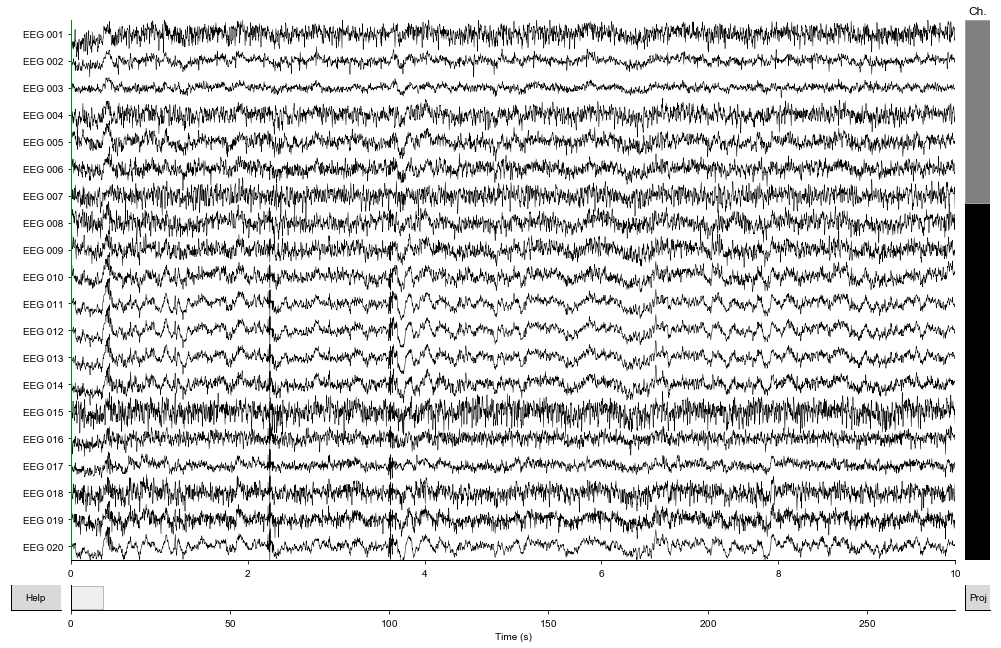

In [25]:
highpass_data.plot();

In [26]:
highpass_data.set_eeg_reference(ref_channels='average')

Applying average reference.
Applying a custom EEG reference.


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 59 x 166800 (277.7 sec), ~78.2 MB, data loaded>

## Add events to mark important stuff happening during a task

In [27]:
# Read in event timings
event_id = {'auditory': 1, 'visual': 3}
events = mne.read_events(sample_dir + '/sample_audvis_raw-eve.fif',
                         include=list(event_id.values()))
print(events[:5])

[[28345     0     3]
 [28771     0     1]
 [30025     0     3]
 [30450     0     1]
 [31665     0     3]]


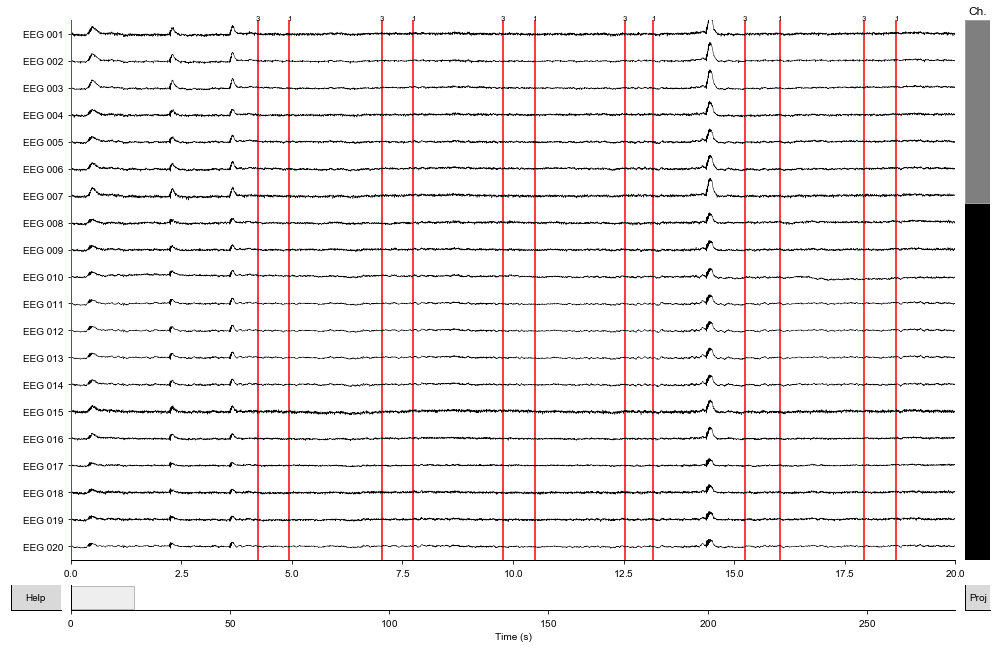

In [28]:
raw.plot(events=events, event_color='red', duration=20, scalings='auto');

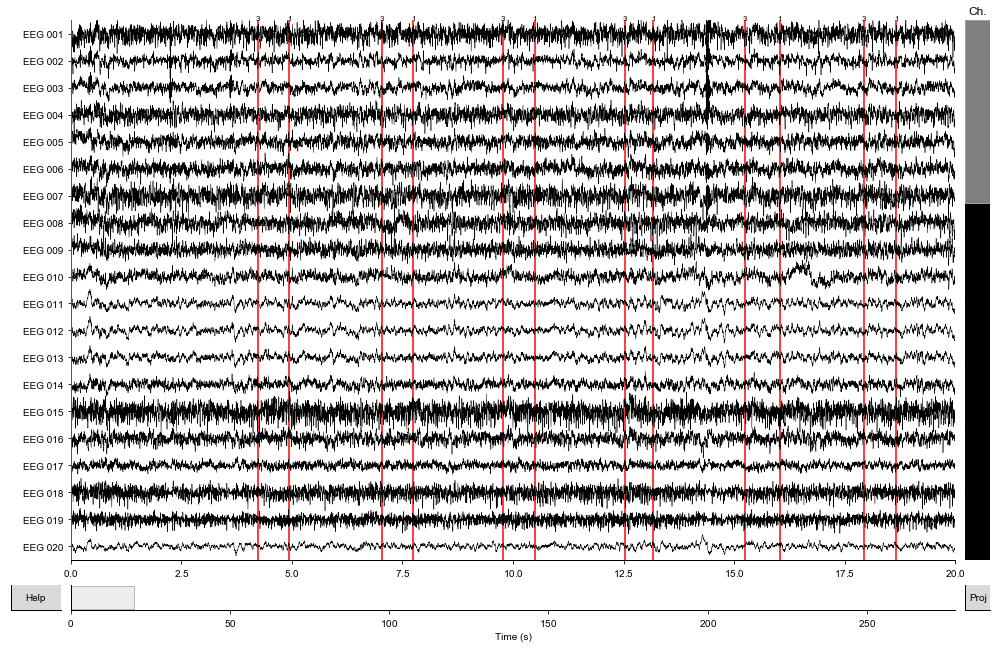

In [29]:
highpass_data.plot(events=events, event_color='red', duration=20, scalings='auto');

In [30]:
# Create epochs
epochs = mne.Epochs(highpass_data, events, event_id)

print('\n---\n\n', epochs.get_data().shape)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
3 projection items activated
Loading data for 145 events and 421 original time points ...
0 bad epochs dropped

---

 (145, 59, 421)


No picks and no groupby, showing the first five channels ...
Loading data for 145 events and 421 original time points ...
145 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


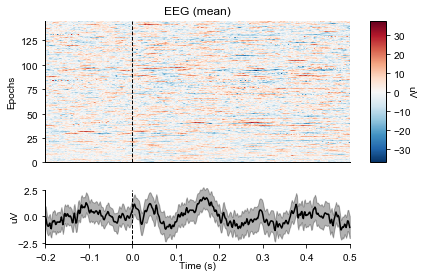

[<Figure size 432x288 with 3 Axes>]

In [31]:
epochs.plot_image(combine='mean')

Loading data for 145 events and 421 original time points ...
Loading data for 5 events and 421 original time points ...


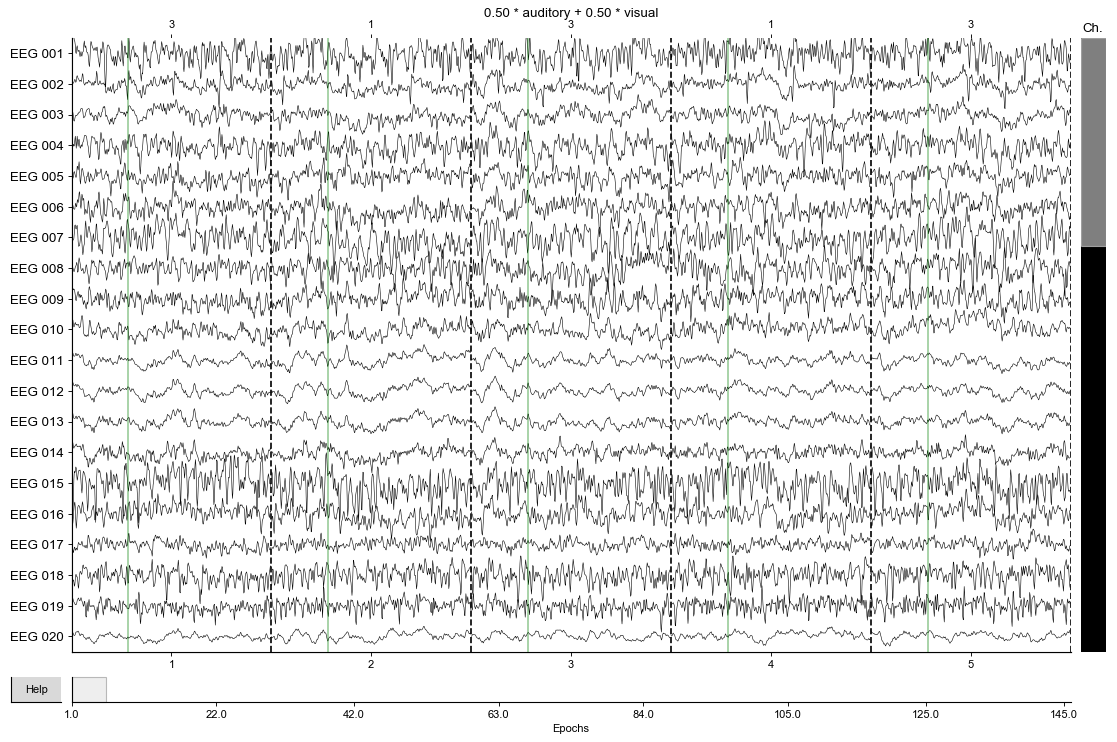

In [32]:
epochs.plot(n_epochs=5, scalings='auto');

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-33-4c77cc35c531>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average().plot();


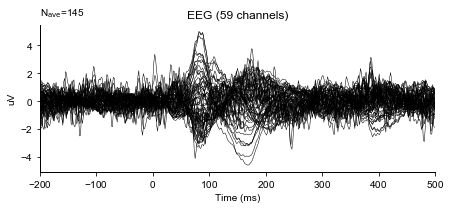

In [33]:
epochs.average().plot();

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-34-7abcfbd1975c>:11: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  _ = av.plot_joint(picks=ixs_plot, title=kind)


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-34-7abcfbd1975c>:11: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  _ = av.plot_joint(picks=ixs_plot, title=kind)


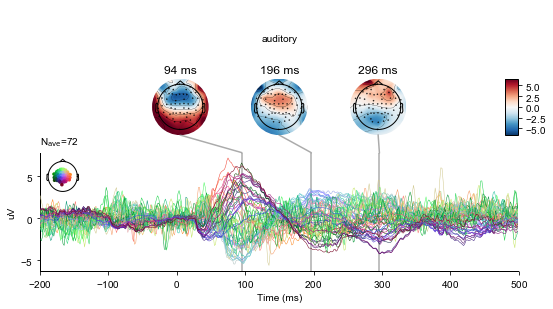

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-34-7abcfbd1975c>:11: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  _ = av.plot_joint(picks=ixs_plot, title=kind)


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-34-7abcfbd1975c>:11: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  _ = av.plot_joint(picks=ixs_plot, title=kind)


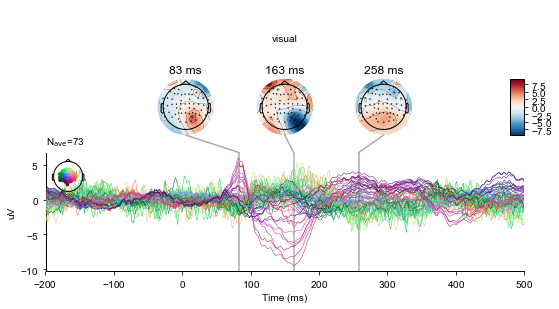

In [34]:
# Plot the mean response for each subset
for kind in event_id.keys():
    # Take the subset and calculate the average
    subset = epochs[kind]
    av = subset.average()
    
    # Only take a subset of electrodes
    ixs_plot = mne.pick_types(av.info, meg=False, eeg=True)

    # Make the plot
    _ = av.plot_joint(picks=ixs_plot, title=kind)

In [35]:
# Create epochs including different events
tmin = -0.2
tmax = 2
event_id = {'audio/left': 1, 'audio/right': 2,
            'visual/left': 3, 'visual/right': 4}
events = mne.read_events(sample_dir + '/sample_audvis_raw-eve.fif',
                         include=list(event_id.values()))

epochs = mne.Epochs(highpass_data, events, event_id, tmin, tmax,
                    baseline=(None, 0))

# Generate list of evoked objects from conditions names
evokeds = [epochs[name].average() for name in ('left', 'right')]

289 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
3 projection items activated


No picks, plotting the GFP ...


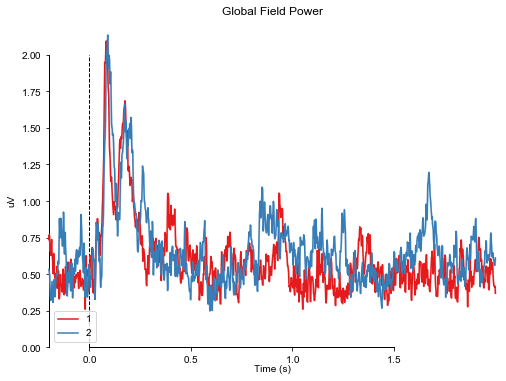

In [43]:
mne.viz.plot_compare_evokeds(evokeds);

No picks, plotting the GFP ...


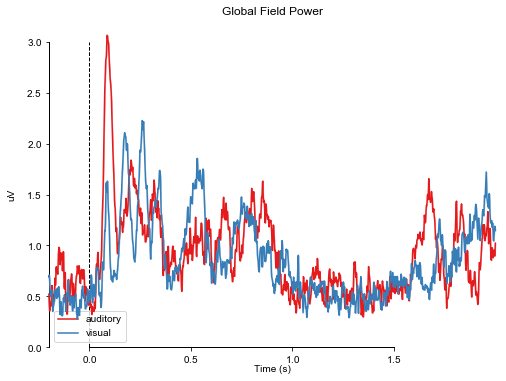

In [42]:
mne.viz.plot_compare_evokeds(dict(auditory=epochs['audio'].average(), visual=epochs['visual'].average()));